# Model a Galaxy Cluster

## Notebook for generating an example galaxy cluster model. 

This notebook goes through the steps to generate model data for galaxy cluster weak lensing observables.  In particular, we define a galaxy cluster model that follows and NFW distribution and generate various profiles for the model (mass density, convergence, shear, etc.), which we plot.  Note, a full pipeline to measure a galaxy cluster weak lensing mass requires fitting the observed (or mock) data to a model.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Imports specific to clmm 

In [2]:
import os
os.environ['CLMM_MODELING_BACKEND'] = 'ccl' # here you may choose ccl, nc (NumCosmo) or ct (cluster_toolkit)

import clmm
import clmm.theory as m
from clmm import Cosmology

Make sure we know which version we're using

In [3]:
clmm.__version__

'1.1.5'

Define a cosmology using astropy

In [4]:
cosmo = Cosmology(H0 = 70.0, Omega_dm0 = 0.27 - 0.045, Omega_b0 = 0.045, Omega_k0 = 0.0)

Define the galaxy cluster model.  Here, we choose parameters that describe the galaxy cluster model, including the mass definition, concentration, and mass distribution.  For the mass distribution, we choose a distribution that follows an NFW profile.

In [23]:
#cluster properties
density_profile_parametrization = 'nfw'
mass_Delta = 200
cluster_mass = 1.e15
cluster_concentration = 4
z_cl = 1.

#source properties
z_source = 2. #all sources in the same plan
z_distrib_func = clmm.utils._chang_z_distrib #sources redshift following a distribution
alpha = [2, -0.5] 

Quick tests of all theory functionality.

In [6]:
r3d = np.logspace(-2, 2, 100)

In [7]:
rho = m.compute_3d_density(r3d, mdelta=cluster_mass, cdelta=cluster_concentration, 
                       z_cl=z_cl, cosmo=cosmo)

In [8]:
Sigma = m.compute_surface_density(r3d, cluster_mass, cluster_concentration, z_cl, cosmo=cosmo, 
                                  delta_mdef=mass_Delta, 
                                  halo_profile_model=density_profile_parametrization)

In [9]:
DeltaSigma = m.compute_excess_surface_density(r3d, cluster_mass, cluster_concentration, z_cl, cosmo=cosmo, 
                                              delta_mdef=mass_Delta, 
                                              halo_profile_model=density_profile_parametrization)

Lensing quantities assuming sources are at a fixed redshift.

In [10]:
Sigmac = m.compute_critical_surface_density(cosmo, z_cluster=z_cl, z_source=z_source)

In [11]:
gammat = m.compute_tangential_shear(r3d, mdelta=cluster_mass, cdelta=cluster_concentration, z_cluster=z_cl, 
                                    z_source=z_source, cosmo=cosmo, delta_mdef=mass_Delta, 
                                    halo_profile_model=density_profile_parametrization, 
                                    z_src_model='single_plane')

In [12]:
kappa = m.compute_convergence(r3d, mdelta=cluster_mass, cdelta=cluster_concentration, 
                               z_cluster=z_cl, z_source=z_source,
                               cosmo=cosmo, delta_mdef=mass_Delta, 
                               halo_profile_model=density_profile_parametrization, 
                               z_src_model='single_plane')

In [13]:
gt = m.compute_reduced_tangential_shear(r3d, mdelta=cluster_mass, cdelta=cluster_concentration, 
                                        z_cluster=z_cl, z_source=z_source, cosmo=cosmo, 
                                        delta_mdef=mass_Delta, 
                                        halo_profile_model=density_profile_parametrization, 
                                        z_src_model='single_plane')
        

In [14]:
mu = m.compute_magnification(r3d, mdelta=cluster_mass, cdelta=cluster_concentration, 
                                        z_cluster=z_cl, z_source=z_source, cosmo=cosmo, 
                                        delta_mdef=mass_Delta, 
                                        halo_profile_model=density_profile_parametrization, 
                                        z_src_model='single_plane')


In [15]:
mu_bias = m.compute_magnification_bias(r3d, alpha=alpha, mdelta=cluster_mass, cdelta=cluster_concentration, 
                                        z_cluster=z_cl, z_source=z_source, cosmo=cosmo, 
                                        delta_mdef=mass_Delta, 
                                        halo_profile_model=density_profile_parametrization, 
                                        z_src_model='single_plane')


/pbs/throng/lsst/users/mricci/desc/CLMM/clmm/theory/generic.py:67: UserWarning: Magnification is negative for certain radii,                     returning nan for magnification bias in this case.
  warnings.warn('Magnification is negative for certain radii, \
/pbs/throng/lsst/users/mricci/desc/CLMM/clmm/theory/generic.py:69: RuntimeWarning: invalid value encountered in power
  return np.array(magnification)**(np.array([alpha]).T - 1)


Lensing quantities assuming sources follow a given redshift distribution.

In [24]:
gt_z = m.compute_reduced_tangential_shear(r3d, mdelta=cluster_mass, cdelta=cluster_concentration, 
                                        z_cluster=z_cl, z_source=z_source, cosmo=cosmo, 
                                        delta_mdef=mass_Delta, 
                                        halo_profile_model=density_profile_parametrization,
                                        z_src_model='schrabback18',
                                        z_distrib_func = z_distrib_func)
        

Plot the predicted profiles

In [25]:
def plot_profile(r, profile_vals, profile_label='rho', label = ''):
    plt.loglog(r, profile_vals, label=label)
    plt.xlabel('r [Mpc]', fontsize='xx-large')
    plt.ylabel(profile_label, fontsize='xx-large')

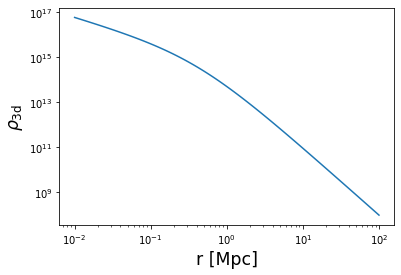

In [26]:
plot_profile(r3d, rho, '$\\rho_{\\rm 3d}$')

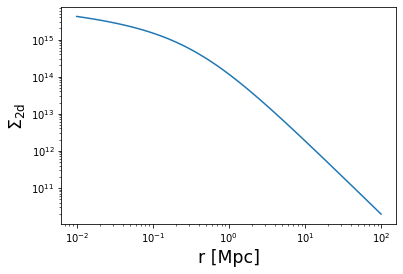

In [27]:
plot_profile(r3d, Sigma, '$\\Sigma_{\\rm 2d}$')

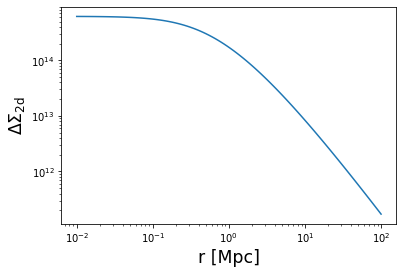

In [28]:
plot_profile(r3d, DeltaSigma, '$\\Delta\\Sigma_{\\rm 2d}$')

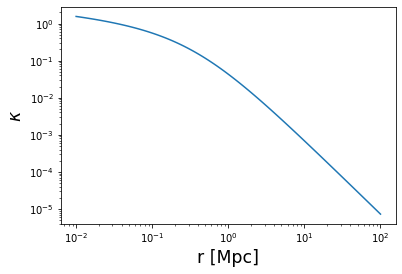

In [29]:
plot_profile(r3d, kappa, '$\\kappa$')

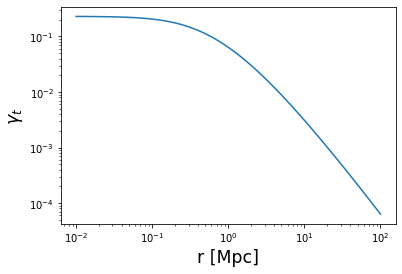

In [30]:
plot_profile(r3d, gammat, '$\\gamma_t$')

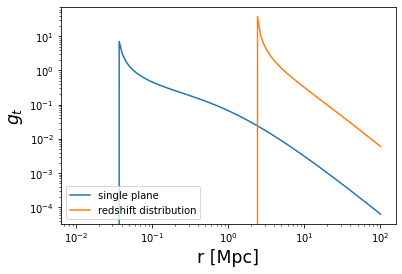

In [44]:
plot_profile(r3d, gt, '$g_t$', label = 'single plane')
plot_profile(r3d, gt_z, '$g_t$', label = 'redshift distribution')
plt.legend()

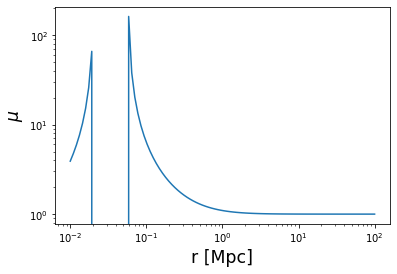

In [45]:
plot_profile(r3d, mu, '$\mu$')

(-3.0, 5.0)

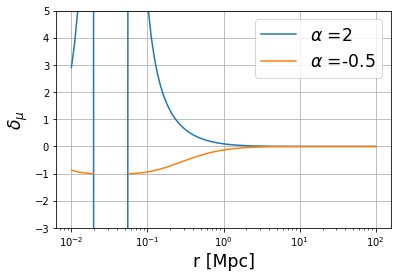

In [46]:
plot_profile(r3d, mu_bias[0]-1, profile_label = '$\delta_{\mu}$', label = '$\\alpha$ =' + str(alpha[0]))
plot_profile(r3d, mu_bias[1]-1, '$\delta_{\mu}$', label = '$\\alpha$ =' + str(alpha[1]))

plt.legend(fontsize='xx-large')
plt.yscale('linear')
plt.grid()

plt.ylim(-3,5)

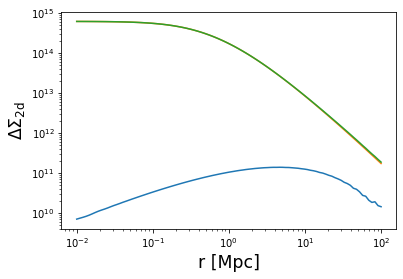

In [51]:
# The 2-halo term excess surface density is only implemented for the CCL and NC backends
# An error will be raised if using the CT backend instead

DeltaSigma_2h = m.compute_excess_surface_density_2h(r3d, z_cl, cosmo=cosmo, halobias=0.3)
plot_profile(r3d, DeltaSigma_2h, '$\\Delta\\Sigma_{\\rm 2h}$')
plot_profile(r3d, DeltaSigma, '$\\Delta\\Sigma_{\\rm 2d}$')
plot_profile(r3d, DeltaSigma+DeltaSigma_2h, '$\\Delta\\Sigma_{\\rm 2d}$')

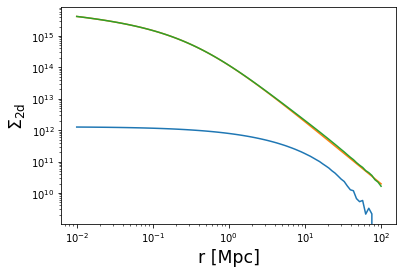

In [52]:
# The 2-halo term excess surface density is only implemented for the CCL and NC backends
# An error will be raised if using the CT backend instead

Sigma_2h = m.compute_surface_density_2h(r3d, z_cl, cosmo=cosmo, halobias=0.3)
plot_profile(r3d, Sigma_2h, '$\\Sigma_{\\rm 2h}$')
plot_profile(r3d, Sigma, '$\\Sigma_{\\rm 2d}$')
plot_profile(r3d, Sigma+Sigma_2h, '$\\Sigma_{\\rm 2d}$')